In [10]:
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame

# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape :', X.shape)

Original Dataframe shape : (569, 31)
Inputs Dataframe shape : (569, 30)


<p>Теперь мы применим первый шаг, который заключается в стандартизации данных, и для этого нам нужно сначала рассчитать среднее и стандартное отклонение каждого признака в пространстве признаков.</p>

In [11]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

<p>Ковариационная матрица помогает нам визуализировать, насколько сильна зависимость двух признаков друг от друга в пространстве признаков.</p>

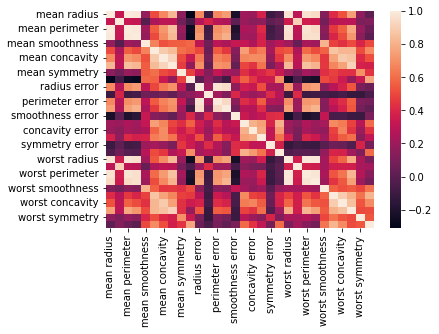

In [12]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

<p>Теперь мы вычислим собственные векторы и собственные значения для нашего пространства признаков, которые служат важной цели при определении основных компонентов нашего пространства признаков.</p>

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


<p>Отсортируем собственные значения в порядке убывания и таким образом отсортируем соответствующие собственные векторы.</p>

In [14]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

<p>Объясненная дисперсия — это термин, который дает нам представление о сумме общей дисперсии, которая была сохранена за счет выбора главных компонентов вместо исходного пространства признаков.</p>

In [15]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
 0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
 0.961366 , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
 0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
 0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
 0.99968761, 0.99991763, 0.99997061, 0.99999557, 1. ])

<p>Определение количество основных компонентов</p>
<p>Мы можем либо рассмотреть количество главных компонентов любого значения по нашему выбору, либо ограничить объясняемую дисперсию. Здесь рассматривается объясненная дисперсия более 50%. Давайте проверим, сколько главных компонентов сюда входит.</p>

In [16]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

<p>Спроецируйте данные на выбранные основные компоненты</p>
<p>Найдем матрицу проекции. Это матрица собственных векторов, соответствующих наибольшим собственным значениям ковариационной матрицы данных. он проецирует многомерный набор данных на подпространство меньшей размерности</p>
<p>Собственные векторы ковариационной матрицы данных называются главными осями данных, а проекции экземпляров данных на эти главные оси называются главными компонентами.</p>

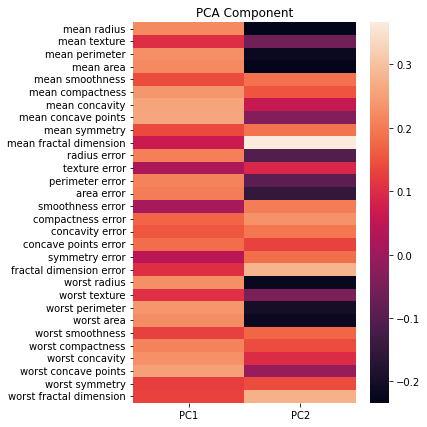

In [17]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
							index = cancer['feature_names'],
							columns = ['PC1','PC2']
							)

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

<p>Уменьшение размерности достигается за счет сохранения только тех осей (размеров), на которые приходится большая часть дисперсии, и отбрасывания всех остальных.</p>

In [18]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the Pricipal Component values
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


<p>Собственные векторы ковариационной матрицы данных называются главными осями данных, а проекции экземпляров данных на эти главные оси называются главными компонентами. Уменьшение размерности достигается за счет сохранения только тех осей (размеров), на которые приходится большая часть дисперсии, и отбрасывания всех остальных.</p>

<p>Существуют различные библиотеки, в которых весь процесс анализа главных компонентов автоматизирован путем реализации его в пакете как функции, и нам просто нужно передать количество главных компонентов, которое мы хотели бы иметь. Sklearn — одна из таких библиотек, которую можно использовать для PCA, как показано ниже.</p>

In [19]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)

           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


<p>Мы можем сопоставить df_pca1 и приведенный выше результат Z_pca, поскольку он имеет точно такие же значения.</p>

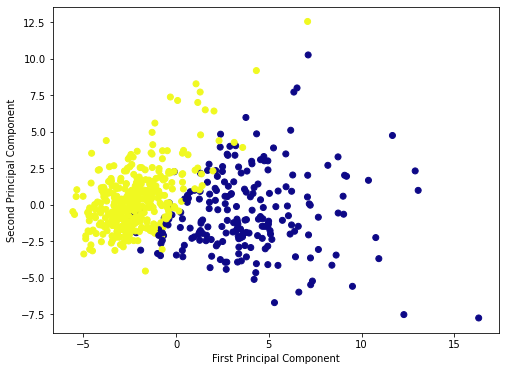

In [20]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
			c=cancer['target'],
			cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [21]:
# components
pca.components_

array([[ 0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
 0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
 0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
 0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
 0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
 0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394],
 [-0.23385713, -0.05970609, -0.21518136, -0.23107671, 0.18611302,
 0.15189161, 0.06016536, -0.0347675 , 0.19034877, 0.36657547,
 -0.10555215, 0.08997968, -0.08945723, -0.15229263, 0.20443045,
 0.2327159 , 0.19720728, 0.13032156, 0.183848 , 0.28009203,
 -0.21986638, -0.0454673 , -0.19987843, -0.21935186, 0.17230435,
 0.14359317, 0.09796411, -0.00825724, 0.14188335, 0.27533947]])